# Importing dataset

The MNIST dataset is a popular choice for this task. It consists of 28x28 grayscale images of handwritten digits and has a training set of 60,000 examples and a test set of 10,000 examples.

Here, TensorFlow is used to load the MNIST dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import datasets
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
labels = np.asarray(train_labels, dtype=np.int32)
test_labels = np.asarray(test_labels, dtype=np.int32)

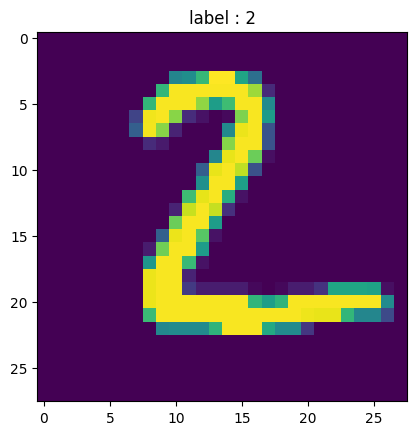

In [4]:
def display(i):
    img = test_images[i]
    plt.title('label : {}'.format(test_labels[i]))
    plt.imshow(img.reshape((28, 28)))
     
# image in TensorFlow is 28 by 28 px
display(1)

## Data preprocessing 

Preprocess the data to prepare it for training. Normalize the pixel values to be between 0 and 1 and flatten the 28x28 images into a 1D array of size 784.

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

## Building model

In [6]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

## Compile model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [8]:
model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
750/750 [==============================] - 5s 6ms/step - loss: 0.3324 - accuracy: 0.9062 - val_loss: 0.1857 - val_accuracy: 0.9493
Epoch 2/25
750/750 [==============================] - 4s 6ms/step - loss: 0.1517 - accuracy: 0.9569 - val_loss: 0.1350 - val_accuracy: 0.9608
Epoch 3/25
750/750 [==============================] - 4s 5ms/step - loss: 0.1054 - accuracy: 0.9696 - val_loss: 0.1174 - val_accuracy: 0.9663
Epoch 4/25
750/750 [==============================] - 4s 5ms/step - loss: 0.0802 - accuracy: 0.9763 - val_loss: 0.1084 - val_accuracy: 0.9679
Epoch 5/25
750/750 [==============================] - 4s 5ms/step - loss: 0.0627 - accuracy: 0.9810 - val_loss: 0.0927 - val_accuracy: 0.9727
Epoch 6/25
750/750 [==============================] - 4s 5ms/step - loss: 0.0505 - accuracy: 0.9851 - val_loss: 0.0845 - val_accuracy: 0.9746
Epoch 7/25
750/750 [==============================] - 4s 6ms/step - loss: 0.0411 - accuracy: 0.9879 - val_loss: 0.0865 - val_accuracy: 0.9742
Epoch 

## Evaluating model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 3ms/step - loss: 0.1021 - accuracy: 0.9763
Test accuracy: 0.9763000011444092


## Predicting in test data

In [10]:
predictions = model.predict(test_images[:5])
print(predictions)

1/1 [==============================] - 0s 108ms/step
[[9.7934388e-13 1.8890736e-13 1.5634841e-11 3.7656155e-06 2.0443288e-21
  2.7494456e-13 3.5626622e-22 9.9999619e-01 6.2239124e-13 6.3455796e-09]
 [1.5749749e-14 1.7162657e-09 1.0000000e+00 1.7546722e-16 1.0385526e-27
  9.0656924e-17 1.3048536e-14 3.2504523e-24 2.9512424e-14 3.8808291e-22]
 [7.6198731e-10 9.9996877e-01 1.5082123e-06 5.4326477e-10 4.1089381e-09
  6.2727329e-10 2.0179423e-09 6.6761886e-06 2.3063503e-05 4.2490044e-12]
 [1.0000000e+00 1.1080980e-13 5.1660380e-13 2.2828478e-16 4.9204752e-18
  3.3009335e-13 6.3576189e-10 1.5700384e-10 3.4731327e-21 2.0104912e-12]
 [8.9673304e-12 1.8132246e-14 1.2028137e-12 7.7133574e-19 9.9999452e-01
  2.9668373e-14 5.1999870e-13 1.5597360e-09 1.2359282e-12 5.4833199e-06]]


In [11]:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

[7 2 1 0 4]


## Fine-tuning

In [12]:
fine_tuned_model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(784,)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile the fine-tuned model
fine_tuned_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Fine-tune the model
fine_tuned_model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the fine-tuned model
fine_tuned_test_loss, fine_tuned_test_acc = fine_tuned_model.evaluate(test_images, test_labels)
print(f'Fine-Tuned Model Test Accuracy: {fine_tuned_test_acc}')

Epoch 1/25
750/750 [==============================] - 38s 49ms/step - loss: 0.2385 - accuracy: 0.9258 - val_loss: 0.0708 - val_accuracy: 0.9793
Epoch 2/25
750/750 [==============================] - 36s 48ms/step - loss: 0.0794 - accuracy: 0.9758 - val_loss: 0.0598 - val_accuracy: 0.9810
Epoch 3/25
750/750 [==============================] - 35s 47ms/step - loss: 0.0532 - accuracy: 0.9836 - val_loss: 0.0435 - val_accuracy: 0.9883
Epoch 4/25
750/750 [==============================] - 36s 48ms/step - loss: 0.0391 - accuracy: 0.9878 - val_loss: 0.0491 - val_accuracy: 0.9857
Epoch 5/25
750/750 [==============================] - 36s 48ms/step - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0448 - val_accuracy: 0.9883
Epoch 6/25
750/750 [==============================] - 36s 47ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0509 - val_accuracy: 0.9872
Epoch 7/25
750/750 [==============================] - 36s 49ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0467 - val_accuracy:

## Classification report

In [13]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

report = classification_report(test_labels, predicted_classes)
print("Base Model Classification Report:\n", report)

313/313 [==============================] - 1s 2ms/step
Base Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
fine_tuned_predictions = fine_tuned_model.predict(test_images)
fine_tuned_predicted_classes = np.argmax(fine_tuned_predictions, axis=1)

fine_tuned_report = classification_report(test_labels, fine_tuned_predicted_classes)
print("Fine-Tuned Model Classification Report:\n", fine_tuned_report)

313/313 [==============================] - 3s 8ms/step
Fine-Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Base Model Classification Report:
Accuracy: 98%
Precision: High precision for all classes, indicating a low false-positive rate.
Recall: High recall for all classes, indicating a low false-negative rate.
F1-Score: High F1-score for all classes, considering both precision and recall.

## Fine-Tuned Model Classification Report:
Accuracy: 99% (slightly improved compared to the base model).
Precision: Maintains high precision for all classes.
Recall: High recall for all classes.
F1-Score: High F1-score for all classes.

## Analysis:
The fine-tuned model shows a slight improvement in accuracy compared to the base model.
Both models exhibit high precision, recall, and F1-score for all classes, indicating strong performance.
Class 8 has a slightly lower recall in the fine-tuned model, suggesting that it might be slightly more challenging for the model to correctly classify instances of this class.

## Conclusion:
The fine-tuned model appears to perform slightly better than the base model, with a small increase in accuracy.
The high precision, recall, and F1-score for all classes suggest that both models are effective in classifying digits on the MNIST dataset.

## Confusion matrix

A confusion matrix is a great way to visualize the performance of a classification model

Confusion matrix for base model:



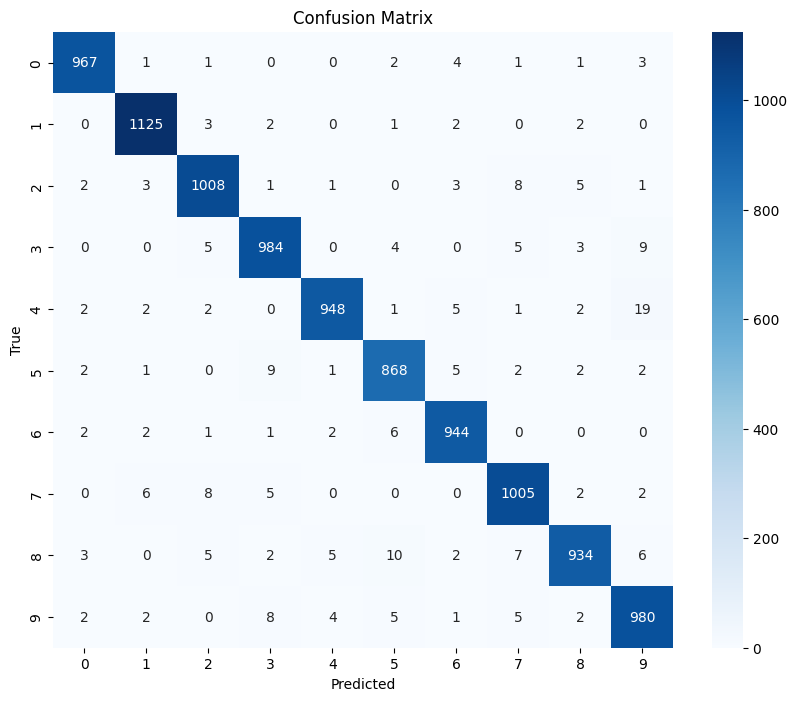

Confusion matrix for fine-tuned model:



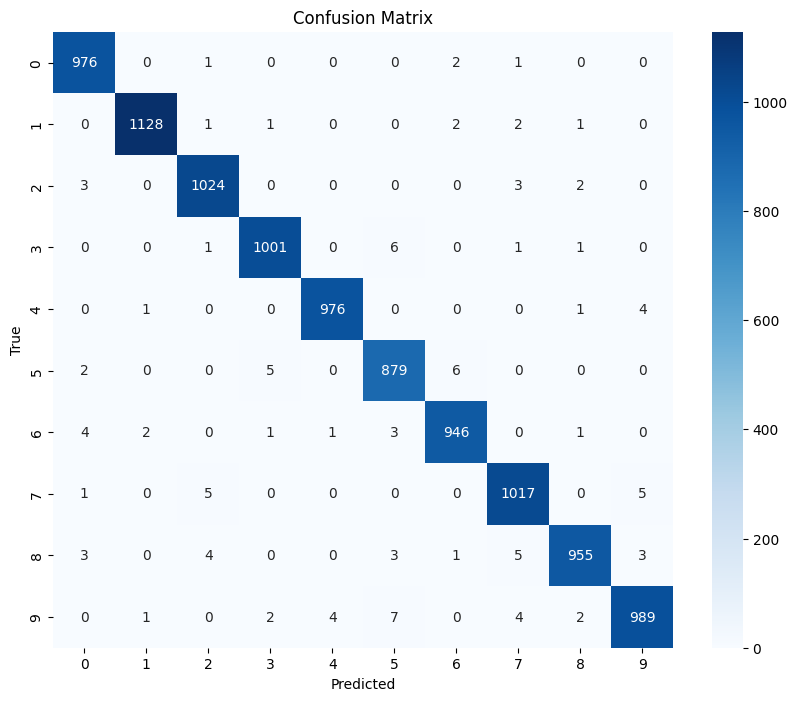

In [15]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# For the base model
print("Confusion matrix for base model:\n")
plot_confusion_matrix(test_labels, predicted_classes, classes=range(10))

# For the fine-tuned model
print("Confusion matrix for fine-tuned model:\n")
plot_confusion_matrix(test_labels, fine_tuned_predicted_classes, classes=range(10))


## Visualizing Misclassifications

Visualize misclassifications to understand where the model is making errors

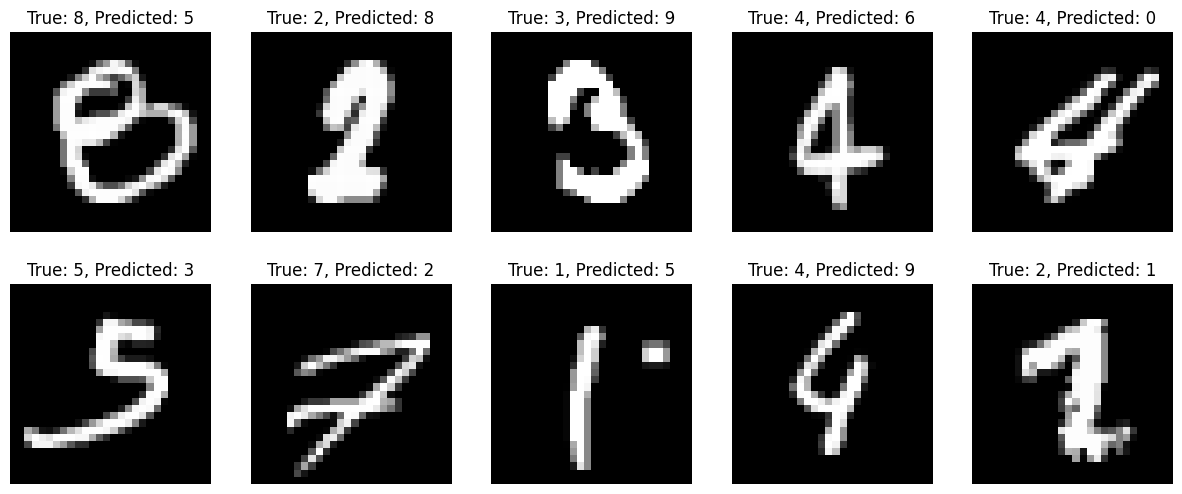

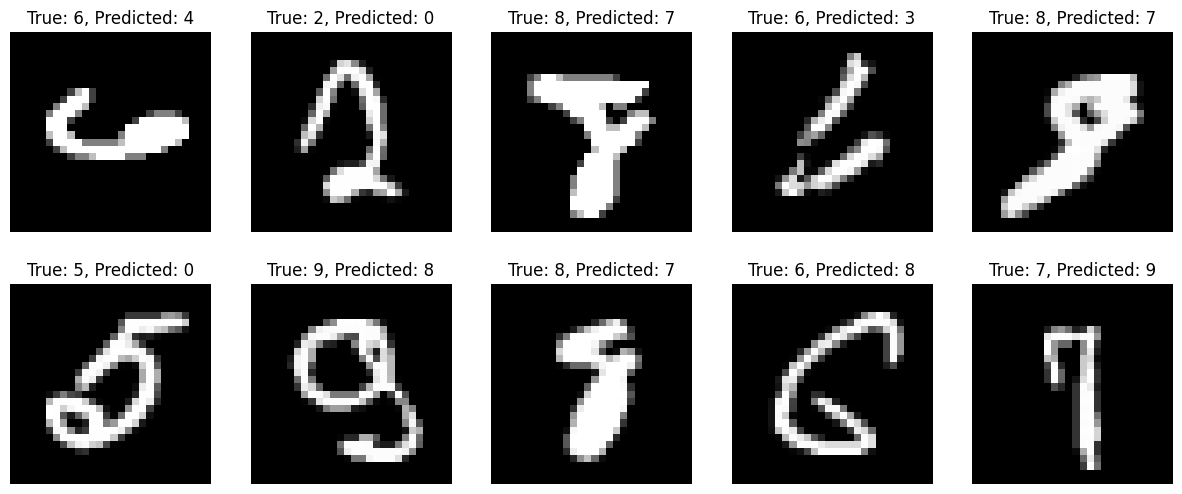

In [16]:
# Function to plot misclassifications
def plot_misclassifications(model, test_images, test_labels, predicted_classes, num_samples=10):
    misclassifications = np.where(test_labels != predicted_classes)[0]
    random_samples = np.random.choice(misclassifications, size=num_samples, replace=False)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(random_samples, 1):
        plt.subplot(2, 5, i)
        plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {test_labels[idx]}, Predicted: {predicted_classes[idx]}')
        plt.axis('off')
    
    plt.show()

# For the base model
plot_misclassifications(model, test_images, test_labels, predicted_classes)

# For the fine-tuned model
plot_misclassifications(fine_tuned_model, test_images, test_labels, fine_tuned_predicted_classes)
